<a href="https://colab.research.google.com/github/pkrodev/Project1-Multi-class_classification/blob/main/Project_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import os
import shutil
folder_do_usuniecia = './images'
if os.path.exists(folder_do_usuniecia):
    shutil.rmtree(folder_do_usuniecia)
    print("Directory has been deleted.")
else:
    print("Directory doesn't exist.")

Directory has been deleted.


In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

np.set_printoptions(precision=6, suppress=True)

In [62]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
!unzip -q flying-vehicles.zip

--2024-03-31 21:56:58--  https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 173.194.196.207, 173.194.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540232238 (1.4G) [application/x-zip-compressed]
Saving to: ‘flying-vehicles.zip’

flying-vehicles.zip 100%[===================>]   1.43G  32.6MB/s    in 46s     

2024-03-31 21:57:45 (32.0 MB/s) - ‘flying-vehicles.zip’ saved [1540232238/1540232238]

replace data/planes/drone/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [63]:
def build_model():
  model = Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(units=256, activation='relu'))
  model.add(layers.Dense(units=6, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(0.00001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
  return model

In [64]:
def bad_prediction_save(path_of_bad_predictions):
  folder_path_misclassified='./images/test'
  os.mkdir('./wrong_prediction/')
  x='./wrong_prediction'
  for i in path_of_bad_predictions:
    r=os.path.join(folder_path_misclassified,i)
    shutil.copy(r, x)

In [65]:
def copy_files(source_dir, dest_dir, filenames):

    for fname in filenames:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)


def make_dirs(dirs):

    for directory in dirs:
        if not os.path.exists(directory):
            os.mkdir(directory)

In [66]:
def display_augmented_images(directory, idx):

    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break


In [67]:
base_dir = './data/planes'
make_dirs(['./images'])
data_dir = './images'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

dirs = [train_dir, valid_dir, test_dir]

make_dirs(dirs)


In [68]:
classes = ['drone', 'passenger-plane', 'helicopter', 'fighter-jet', 'missile', 'rocket']


total_size = float('inf')


for cls in classes:
    class_dir = os.path.join(base_dir, cls)       #'./data/planes/drone'  ./data/planes/passenger-plane
    class_files = os.listdir(class_dir)
    class_files = [fname for fname in class_files if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
    total_size = min(total_size, len(class_files))


train_size = int(total_size * 0.7)
valid_size = int(total_size * 0.2)
test_size = total_size - train_size - valid_size


for cls in classes:
    class_dir = os.path.join(base_dir, cls)
    class_files = os.listdir(class_dir)
    class_files = [fname for fname in class_files if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

    class_files = class_files[:total_size]
    train_files = class_files[:train_size]

    valid_files = class_files[train_size:train_size + valid_size]
    test_files = class_files[train_size + valid_size:]

    train_dest = os.path.join(train_dir, cls)
    valid_dest = os.path.join(valid_dir, cls)
    test_dest = os.path.join(test_dir, cls)

    make_dirs([train_dest, valid_dest, test_dest])

    copy_files(class_dir, train_dest, train_files)
    copy_files(class_dir, valid_dest, valid_files)
    copy_files(class_dir, test_dest, test_files)

    print(f'{cls} - zbiór treningowy', len(train_files))
    print(f'{cls} - zbiór walidacyjny', len(valid_files))
    print(f'{cls} - zbiór testowy', len(test_files))

drone - zbiór treningowy 821
drone - zbiór walidacyjny 234
drone - zbiór testowy 118
passenger-plane - zbiór treningowy 821
passenger-plane - zbiór walidacyjny 234
passenger-plane - zbiór testowy 118
helicopter - zbiór treningowy 821
helicopter - zbiór walidacyjny 234
helicopter - zbiór testowy 118
fighter-jet - zbiór treningowy 821
fighter-jet - zbiór walidacyjny 234
fighter-jet - zbiór testowy 118
missile - zbiór treningowy 821
missile - zbiór walidacyjny 234
missile - zbiór testowy 118
rocket - zbiór treningowy 821
rocket - zbiór walidacyjny 234
rocket - zbiór testowy 118


In [69]:
folder_path_drone = './images/train/drone'
files_list_drone = os.listdir(folder_path_drone)
folder_path_plane = './images/train/passenger-plane'
files_list_plane = os.listdir(folder_path_plane)
folder_path_heli = './images/train/helicopter'
files_list_heli = os.listdir(folder_path_heli)
folder_path_fighter = './images/train/fighter-jet'
files_list_fighter = os.listdir(folder_path_fighter)
folder_path_missile = './images/train/missile'
files_list_missile = os.listdir(folder_path_missile)
folder_path_rocket = './images/train/rocket'
files_list_rocket = os.listdir(folder_path_rocket)

(-0.5, 1469.5, 1119.5, -0.5)

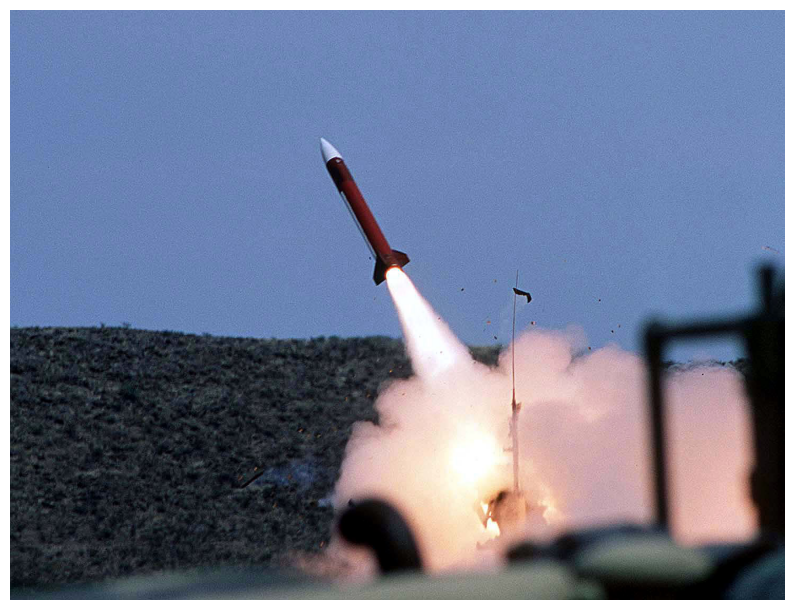

In [70]:
#@title Selection by index of missile photos

idx = 160 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_missile))
img_path = os.path.join(folder_path_missile, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 629.5, 362.5, -0.5)

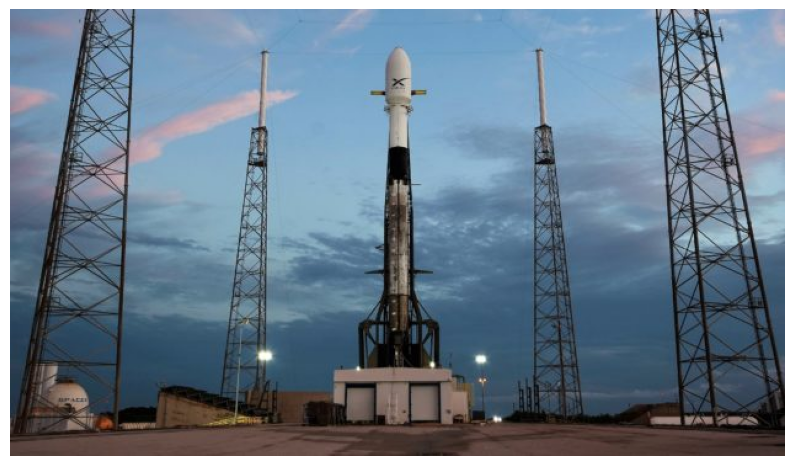

In [71]:
#@title Selection by index of rocket photos

idx = 559 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_rocket))
img_path = os.path.join(folder_path_rocket, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 638.5, 425.5, -0.5)

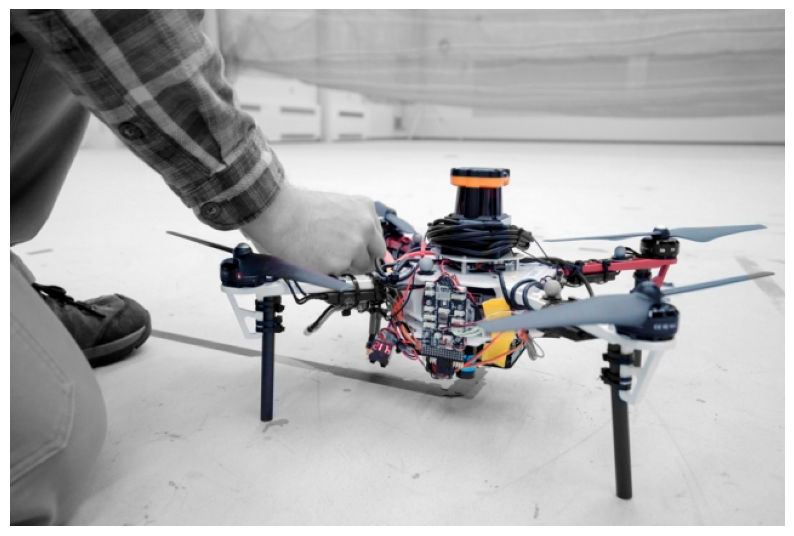

In [72]:
#@title Selection by index of drone photos

idx = 559 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_drone))
img_path = os.path.join(folder_path_drone, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 1599.5, 1201.5, -0.5)

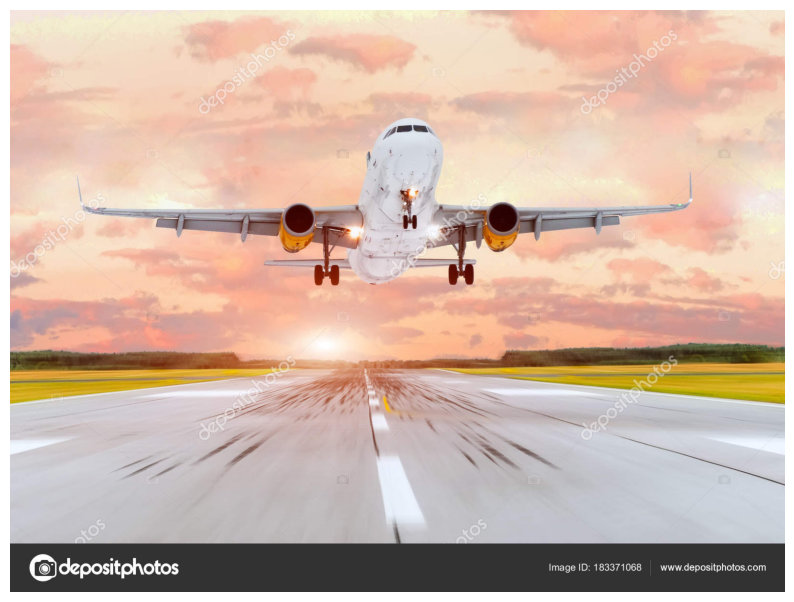

In [73]:

#@title Selection by index of passenger-plane photos

idx = 101 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_plane))
img_path = os.path.join(folder_path_plane, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 967.5, 680.5, -0.5)

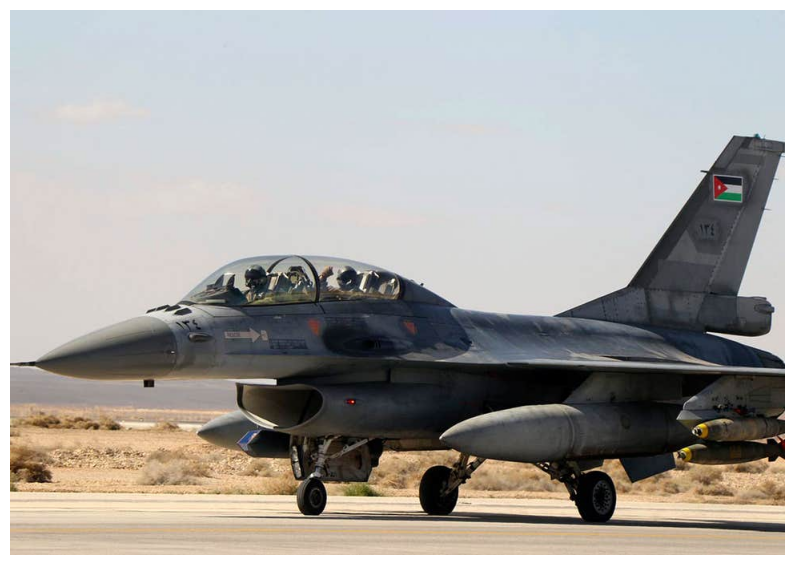

In [74]:
#@title Selection by index of fighter photos

idx = 820 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_fighter))
img_path = os.path.join(folder_path_fighter, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 4544.5, 3029.5, -0.5)

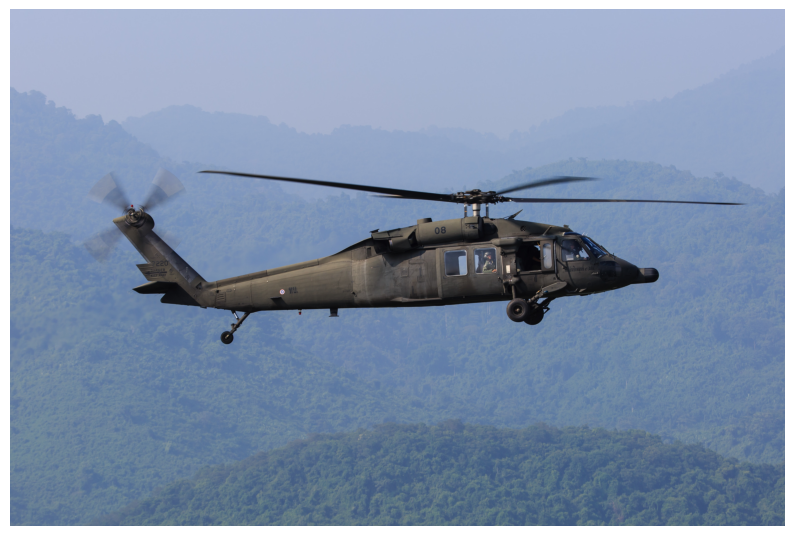

In [75]:
#@title Selection by index of heli photos

idx = 814 #@param {type: 'slider', min:0, max: 821}
names_mapping=dict(enumerate(files_list_heli))
img_path = os.path.join(folder_path_heli, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [76]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 4926 images belonging to 6 classes.
Found 1404 images belonging to 6 classes.


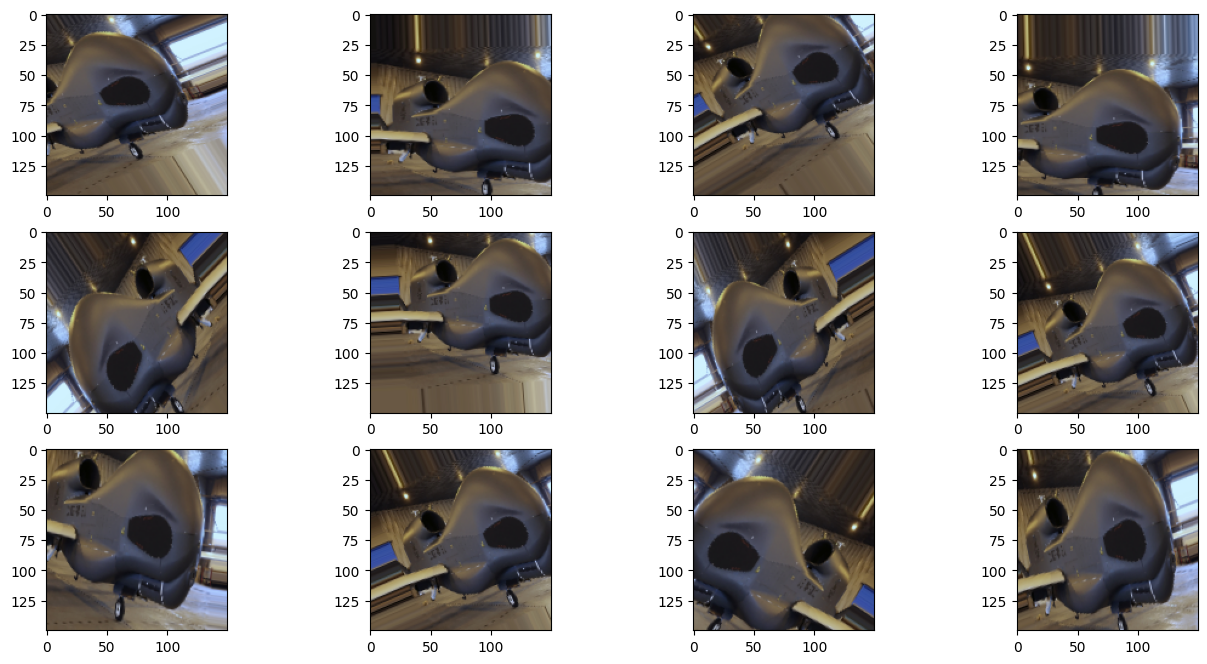

In [77]:
#@title Drone training dataset:
idx = 199 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_drone, idx)

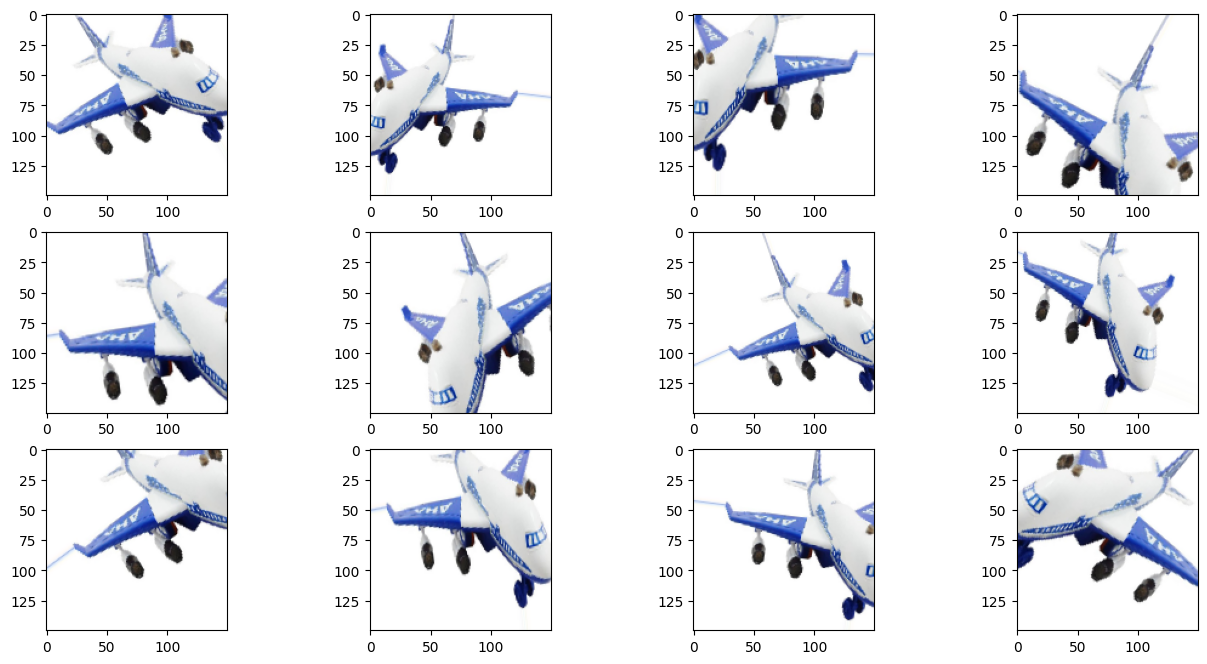

In [78]:
#@title Passenger training dataset:
idx = 359 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_plane, idx)

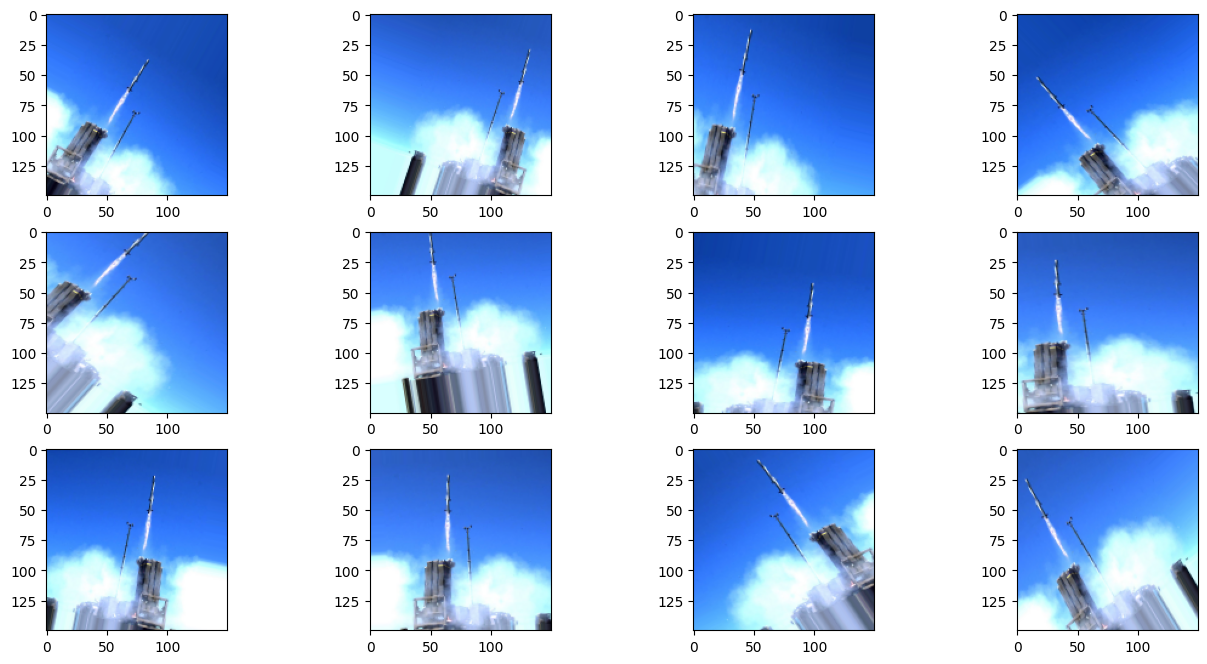

In [79]:
#@title Missile training dataset:
idx = 359 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_missile, idx)

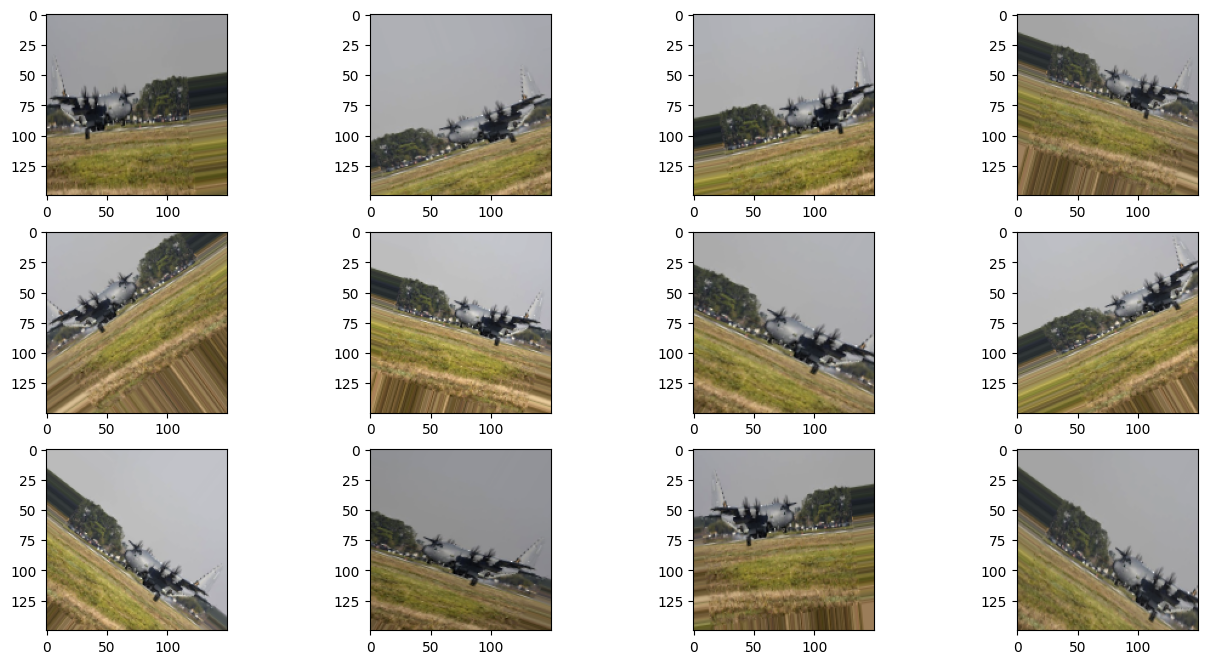

In [80]:
#@title Rocket training dataset:
idx = 247 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_rocket, idx)

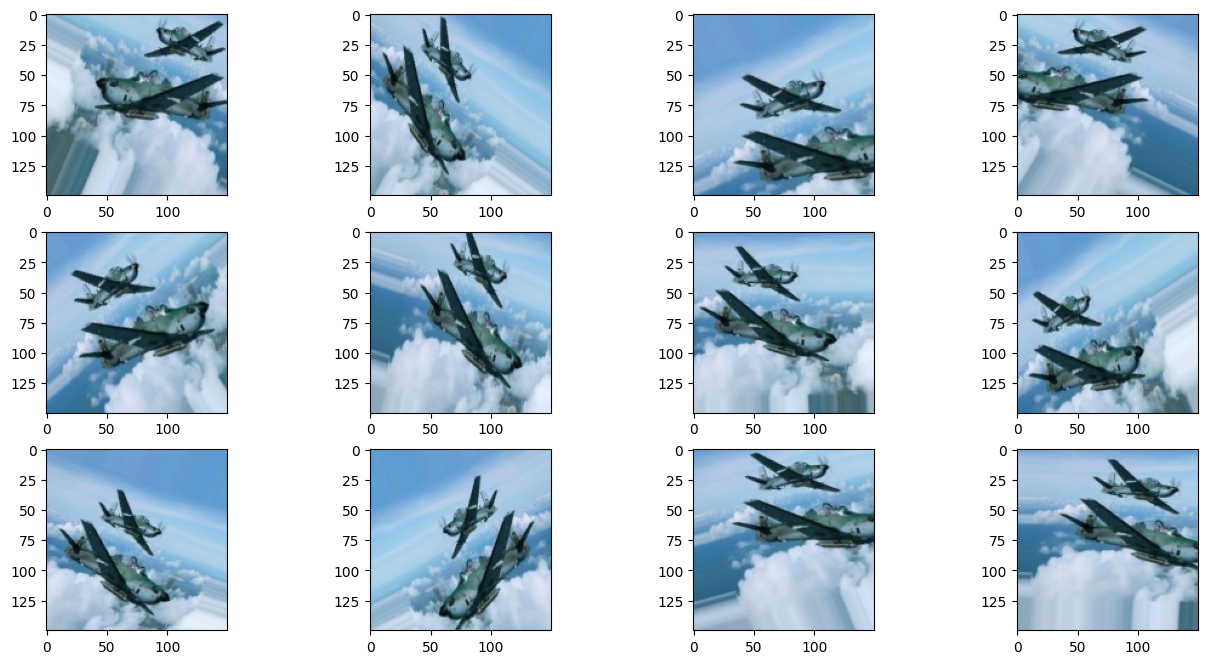

In [81]:
#@title Fighter training dataset:
idx = 220 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_fighter, idx)

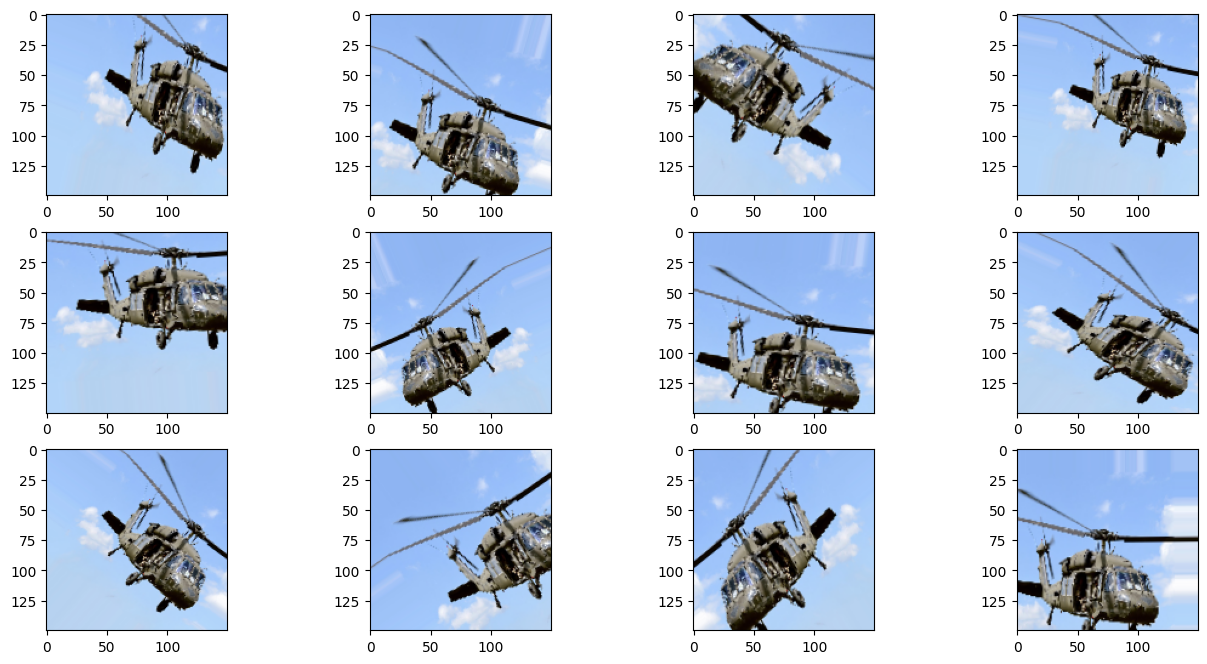

In [82]:
#@title Heli training dataset:
idx = 359 #@param {type:'slider', min:0, max:821}
display_augmented_images(folder_path_heli, idx)

In [83]:
batch_size = 32
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

In [84]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')

print_layers(conv_base)

layer_name: input_2       trainable: True
layer_name: block1_conv1  trainable: True
layer_name: block1_conv2  trainable: True
layer_name: block1_pool   trainable: True
layer_name: block2_conv1  trainable: True
layer_name: block2_conv2  trainable: True
layer_name: block2_pool   trainable: True
layer_name: block3_conv1  trainable: True
layer_name: block3_conv2  trainable: True
layer_name: block3_conv3  trainable: True
layer_name: block3_conv4  trainable: True
layer_name: block3_pool   trainable: True
layer_name: block4_conv1  trainable: True
layer_name: block4_conv2  trainable: True
layer_name: block4_conv3  trainable: True
layer_name: block4_conv4  trainable: True
layer_name: block4_pool   trainable: True
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_conv4  trainable: True
layer_name: block5_pool   trainable: True


In [85]:
filepath = 'best_model_weights.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [86]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [87]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 22123334 (84.39 MB)
Trainable params: 22123334 (84.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=valid_generator,
                    validation_steps=validation_steps,
                    callbacks=[checkpoint,es])

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 1.8478 - accuracy: 0.2087
Epoch 1: val_accuracy improved from -inf to 0.24554, saving model to best_model_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



25/25 [==============================] - 23s 711ms/step - loss: 1.8478 - accuracy: 0.2087 - val_loss: 1.7609 - val_accuracy: 0.2455
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 1.7000 - accuracy: 0.2788
Epoch 2: val_accuracy improved from 0.24554 to 0.31696, saving model to best_model_weights.hdf5
25/25 [==============================] - 18s 715ms/step - loss: 1.7000 - accuracy: 0.2788 - val_loss: 1.6375 - val_accuracy: 0.3170
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 1.6149 - accuracy: 0.3462
Epoch 3: val_accuracy improved from 0.31696 to 0.38393, saving model to best_model_weights.hdf5
25/25 [==============================] - 17s 683ms/step - loss: 1.6149 - accuracy: 0.3462 - val_loss: 1.5865 - val_accuracy: 0.3839
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 1.5863 - accuracy: 0.3571
Epoch 4: val_accuracy improved from 0.38393 to 0.41518, saving model to best_model_weights.hdf5
25/25 [========================

# The poor predictive quality of the model is due to high information noise. (Images were not selected after downloading from the web)

In [89]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [90]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob

Found 708 images belonging to 6 classes.


<ipython-input-90-d5c8c634ffeb>:10: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



array([[0.06883 , 0.003292, 0.922206, 0.002452, 0.002058, 0.001163],
       [0.955574, 0.026599, 0.014511, 0.001792, 0.000583, 0.00094 ],
       [0.998845, 0.000263, 0.000096, 0.000117, 0.000648, 0.000031],
       ...,
       [0.152921, 0.088926, 0.002384, 0.004015, 0.00493 , 0.746824],
       [0.014048, 0.632142, 0.005945, 0.007677, 0.054766, 0.285423],
       [0.011564, 0.29659 , 0.052736, 0.003841, 0.080581, 0.554688]],
      dtype=float32)

In [91]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 5, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0,
       5, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 3, 4, 2, 0, 1, 1, 2, 5,
       5, 1, 0, 0, 0, 0, 0, 4, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 5, 0, 5, 3,
       0, 0, 3, 1, 2, 4, 0, 0, 1, 1, 5, 4, 5, 1, 1, 2, 3, 1, 5, 4, 1, 5,
       5, 3, 1, 1, 1, 2, 1, 5, 1, 2, 1, 1, 4, 1, 3, 5, 5, 2, 1, 2, 5, 1,
       5, 5, 4, 4, 5, 5, 1, 2, 5, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 3,
       4, 1, 4, 1, 5, 5, 4, 2, 1, 1, 5, 3, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 5, 4, 0, 3, 1, 1, 1, 4, 5, 4, 2, 5, 5, 5, 5, 1,
       1, 5, 5, 5, 0, 4, 1, 5, 2, 2, 2, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2,

In [92]:
predictions  = pd.DataFrame({'class': y_pred})
predictions

class
0        2
1        0
2        0
3        0
4        0
..     ...
703      2
704      1
705      5
706      1
707      5

[708 rows x 1 columns]

In [93]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [94]:
y_pred = predictions['class'].values
y_pred

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 5, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0,
       5, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 3, 4, 2, 0, 1, 1, 2, 5,
       5, 1, 0, 0, 0, 0, 0, 4, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 5, 0, 5, 3,
       0, 0, 3, 1, 2, 4, 0, 0, 1, 1, 5, 4, 5, 1, 1, 2, 3, 1, 5, 4, 1, 5,
       5, 3, 1, 1, 1, 2, 1, 5, 1, 2, 1, 1, 4, 1, 3, 5, 5, 2, 1, 2, 5, 1,
       5, 5, 4, 4, 5, 5, 1, 2, 5, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 3,
       4, 1, 4, 1, 5, 5, 4, 2, 1, 1, 5, 3, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 5, 4, 0, 3, 1, 1, 1, 4, 5, 4, 2, 5, 5, 5, 5, 1,
       1, 5, 5, 5, 0, 4, 1, 5, 2, 2, 2, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2,

In [95]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 81,   9,   9,   4,   7,   8],
       [  2,  50,  11,   8,  14,  33],
       [  4,   3, 107,   1,   2,   1],
       [  5,  21,   5,  51,  14,  22],
       [ 11,  12,  14,   3,  64,  14],
       [  2,  28,   5,  14,   9,  60]])

In [96]:
def plot_confusion_matrix(cm):

    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)

In [97]:
test_generator.class_indices

{'drone': 0,
 'fighter-jet': 1,
 'helicopter': 2,
 'missile': 3,
 'passenger-plane': 4,
 'rocket': 5}

In [98]:
classes = list(test_generator.class_indices.keys())
classes

['drone', 'fighter-jet', 'helicopter', 'missile', 'passenger-plane', 'rocket']

In [99]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

                 precision    recall  f1-score   support

          drone       0.77      0.69      0.73       118
    fighter-jet       0.41      0.42      0.41       118
     helicopter       0.71      0.91      0.80       118
        missile       0.63      0.43      0.51       118
passenger-plane       0.58      0.54      0.56       118
         rocket       0.43      0.51      0.47       118

       accuracy                           0.58       708
      macro avg       0.59      0.58      0.58       708
   weighted avg       0.59      0.58      0.58       708



In [100]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors

y_true  y_pred
drone/00000021.jpg        0       2
drone/00000027.jpg        0       0
drone/00000033.jpg        0       0
drone/00000045.png        0       0
drone/00000047.jpg        0       0
...                     ...     ...
rocket/00001173.jpg       5       2
rocket/00001208.jpg       5       1
rocket/00001214.jpg       5       5
rocket/00001226.jpg       5       1
rocket/00001230.jpg       5       5

[708 rows x 2 columns]

In [101]:
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
errors

y_true  y_pred  is_incorrect
drone/00000021.jpg        0       2             1
drone/00000027.jpg        0       0             0
drone/00000033.jpg        0       0             0
drone/00000045.png        0       0             0
drone/00000047.jpg        0       0             0
...                     ...     ...           ...
rocket/00001173.jpg       5       2             1
rocket/00001208.jpg       5       1             1
rocket/00001214.jpg       5       5             0
rocket/00001226.jpg       5       1             1
rocket/00001230.jpg       5       5             0

[708 rows x 3 columns]

In [102]:
wrong_true = []
wrong_pred = []
path_of_wrong_predictions=[]
i=0

for index, row in errors[errors['is_incorrect'] == 1].iterrows():

    wrong_true.append(row['y_true'])
    wrong_pred.append(row['y_pred'])
    path_of_wrong_predictions.append(index)
    i+=1

print(wrong_true)
print(wrong_pred)
print(path_of_wrong_predictions)#func arg
print(i)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[2, 2, 2, 5, 4, 3, 4, 4, 2, 2, 2, 5, 1, 5, 1, 1, 4, 3, 4, 2, 1, 1, 2, 5, 5, 1, 4, 5, 1, 1, 5, 5, 3, 3, 1, 2, 4, 5,

In [103]:
bad_prediction_save(path_of_wrong_predictions)

In [104]:
class_indices = test_generator.class_indices
revers = {v: k for k, v in class_indices.items()}

./images/test/drone/00000021.jpg
drone
helicopter
It should be classified as: drone but it was classified as: helicopter


(-0.5, 4218.5, 2372.5, -0.5)

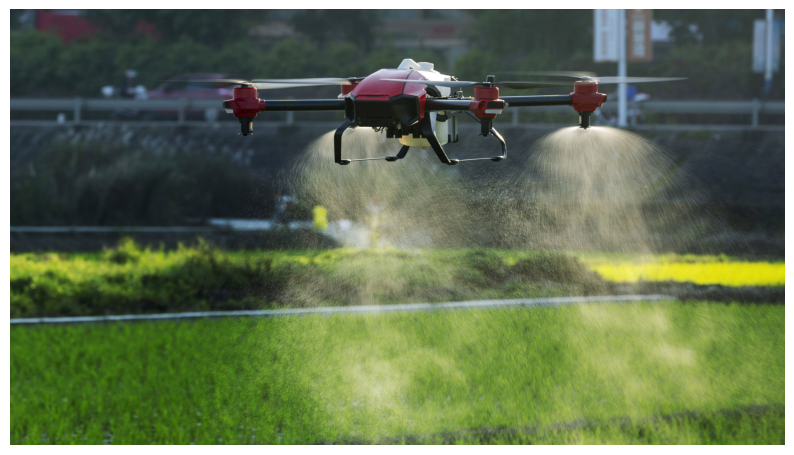

In [105]:
#@title Selection by index of misclassified photos

idx = 0 #@param {type: 'slider', min:0, max:278}
folder_path_misclassified='./images/test'
names_mapping=dict(enumerate(path_of_wrong_predictions))
one = dict(enumerate(wrong_true))
two = dict(enumerate(wrong_pred))
img_path = os.path.join(folder_path_misclassified, names_mapping[idx])
img = image.load_img(img_path)

print(img_path)
print(revers[one[idx]])
print(revers[two[idx]])
print("It should be classified as: "+revers[one[idx]]+" but it was classified as: "+revers[two[idx]])

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)